# 🚖 Exploratory Data Analysis — Uber & Lyft Dynamic Pricing
## Boston, MA · Urban Mobility Strategy Advisory

| | |
|---|---|
| **Analyst** | Mourad Balouri — Data Analytics  |
| **Dataset** | Kaggle — Uber & Lyft Dataset Boston, (~693K rides, ~350MB) |
| **Phase** | 4 — Data Understanding (EDA) |
| **Version** | 1.0 · February 2026 |

---

### ☑️ Checklist — EDA Steps
| # | Step |
|---|------|
| 1 | Review dataset structure | 
| 2 | Classify variables | 
| 3 | Check missing values | 
| 4 | Check duplicates | 
| 5 | Detect outliers | 
| 6 | Validate data consistency | 
| 7 | Analyze price distribution | 
| 8 | Compare Uber vs Lyft pricing |
| 9 | Analyze surge impact |
| 10 | Analyze distance vs price | 
| 11 | Analyze weather impact |
| 12 | Build correlation matrix |
| 13 | Document EDA insights |


---
## Setup

In [68]:
# ── Imports ───────────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ── Display settings ──────────────────────────────────────────────────────────
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.rcParams.update({
    'figure.facecolor' : 'white',
    'axes.facecolor'   : '#f9f9f9',
    'axes.spines.top'  : False,
    'axes.spines.right': False,
    'axes.grid'        : True,
    'grid.alpha'       : 0.3,
    'axes.titlesize'   : 13,
    'axes.titleweight' : 'bold',
    'axes.labelsize'   : 11,
    'figure.dpi'       : 100,
})

# ── Color palette ─────────────────────────────────────────────────────────────
UBER  = '#1a1a1a'
LYFT  = '#bf00aa'
BLUE  = '#2980b9'
RED   = '#e74c3c'
GREEN = '#27ae60'

print('✓ Setup complete')

✓ Setup complete


---
## Step 1 — Review Dataset Structure

In [69]:
# Load the dataset
df = pd.read_csv('../data/raw/data_raw.csv', low_memory=False)

print(f'Dataset loaded successfully')
print(f'  Rows    : {df.shape[0]:,}')
print(f'  Columns : {df.shape[1]}')

Dataset loaded successfully
  Rows    : 693,071
  Columns : 57


In [70]:
# First 5 rows
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,...,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,...,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,...,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,...,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,...,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,...,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [71]:
# Column types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [72]:
# Basic descriptive statistics
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.00,693071.00,693071.00,693071.00,637976.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00,693071.00
mean,1544045709.76,11.62,17.79,11.59,16.55,2.19,1.01,42.34,-71.07,39.58,35.88,0.01,0.15,0.74,6.19,8.47,1544048883.54,8.47,45.04,1544049894.63,34.15,1544102170.88,41.61,1544050235.26,30.14,1544098720.41,31.66,1010.09,220.06,0.69,0.25,8.47,313.51,1544027098.20,1544060438.64,0.58,0.04,1544043966.24,33.46,1544041609.57,45.26,1544047300.03,29.73,1544048034.74,42.00,1544047993.95
std,689192.49,6.95,9.98,0.49,9.32,1.14,0.09,0.05,0.02,6.73,7.92,0.03,0.33,0.14,3.15,5.29,692824.40,2.60,6.00,693792.11,6.38,692292.33,7.67,694169.87,8.06,692737.83,9.14,13.47,99.10,0.36,0.47,2.60,27.95,691139.27,690663.39,0.24,0.06,691202.77,6.47,690195.44,5.65,690135.34,7.11,687186.19,6.94,691077.65
min,1543203646.00,0.00,1.00,11.00,2.50,0.02,1.00,42.21,-71.11,18.91,12.13,0.00,0.00,0.38,0.45,0.80,1543150800.00,0.72,32.68,1543154400.00,17.85,1543233600.00,22.62,1543186800.00,11.81,1543233600.00,4.39,988.09,2.00,0.00,0.00,0.72,269.40,1543146535.00,1543180615.00,0.09,0.00,1543161600.00,15.63,1543122000.00,33.51,1543154400.00,11.81,1543136400.00,28.95,1543186800.00
25%,1543443968.00,6.00,13.00,11.00,9.00,1.28,1.00,42.35,-71.08,36.45,31.91,0.00,0.00,0.64,3.41,4.06,1543431600.00,8.43,42.57,1543438800.00,30.17,1543489200.00,36.57,1543438800.00,27.70,1543478400.00,27.49,999.82,124.00,0.37,0.00,8.43,290.90,1543405938.00,1543439721.00,0.30,0.00,1543420800.00,30.17,1543399200.00,42.57,1543438800.00,27.76,1543399200.00,36.57,1543438800.00
50%,1543737478.00,12.00,17.00,12.00,13.50,2.16,1.00,42.35,-71.06,40.49,35.90,0.00,0.00,0.71,5.91,7.55,1543755600.00,9.88,44.68,1543788000.00,34.18,1543816800.00,40.95,1543788000.00,30.03,1543816800.00,30.69,1009.25,258.00,0.82,0.00,9.88,307.40,1543751761.00,1543785233.00,0.68,0.00,1543770000.00,34.24,1543726800.00,44.68,1543788000.00,30.13,1543744800.00,40.95,1543788000.00
75%,1544827509.00,18.00,28.00,12.00,22.50,2.92,1.00,42.36,-71.05,43.58,40.08,0.00,0.00,0.88,8.41,11.74,1544846400.00,10.00,46.91,1544814000.00,38.73,1544835600.00,44.12,1544817600.00,35.32,1544835600.00,38.12,1021.86,303.00,1.00,0.00,10.00,331.80,1544789239.00,1544822019.00,0.79,0.09,1544806800.00,38.88,1544788800.00,46.91,1544814000.00,35.71,1544788800.00,44.12,1544817600.00
max,1545160511.00,23.00,30.00,12.00,97.50,7.86,3.00,42.37,-71.03,57.22,57.22,0.14,1.00,0.96,15.00,27.25,1545127200.00,10.00,57.87,1545159600.00,46.60,1545220800.00,57.20,1545159600.00,47.25,1545199200.00,50.67,1035.55,356.00,1.00,2.00,10.00,378.90,1545135001.00,1545167693.00,0.93,0.15,1545152400.00,43.10,1545192000.00,57.87,1545109200.00,40.05,1545134400.00,57.20,1545109200.00


In [73]:
# Quick overview of categorical columns
print('Platforms :', df['cab_type'].unique())
print('Services  :', df['name'].unique())
print('Zones     :', df['source'].unique())

Platforms : ['Lyft' 'Uber']
Services  : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']
Zones     : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']


---
> ###  Step 1 Summary — Dataset Structure
> The dataset contains **693,071 rows** and **57 columns**, covering rides from **November to December 2018** in Boston, MA.
> It includes two platforms — **Uber** and **Lyft** — across multiple service tiers.
> The columns are a mix of ride information (price, distance, surge), temporal data (hour, day, datetime), geography (source, destination), and a large block of weather variables.
> The dataset is large enough to produce statistically meaningful results.
---


## Step 2 — Classify Variables

In [74]:
# Separate numeric and categorical columns
numeric_cols     = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'Numeric columns ({len(numeric_cols)}):')
print(numeric_cols)
print(f'\nCategorical columns ({len(categorical_cols)}):')
print(categorical_cols)

Numeric columns (46):
['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

Categorical columns (11):
['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


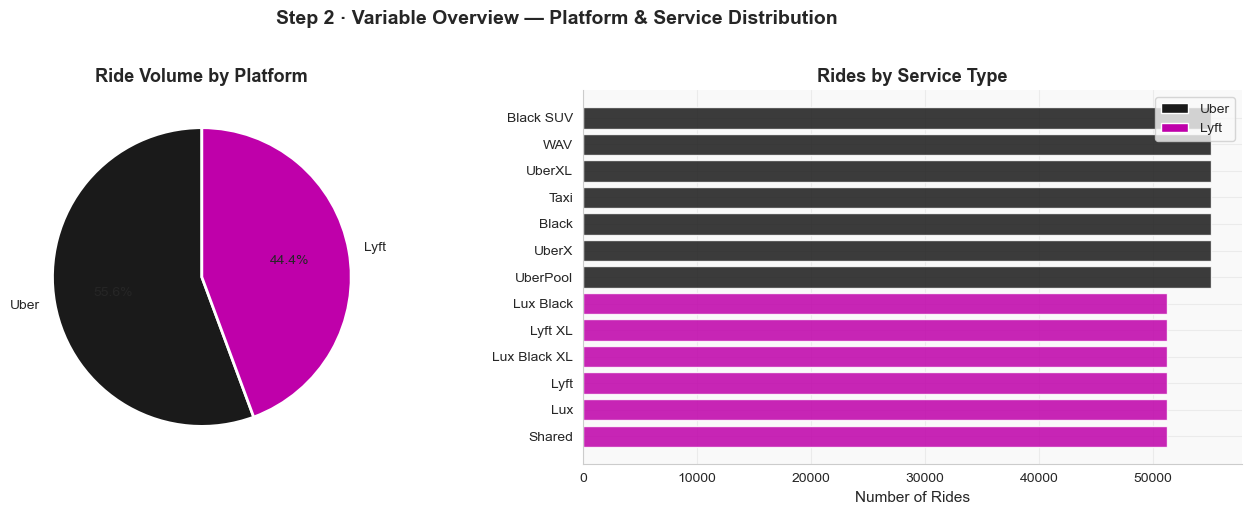

In [75]:
# Ride count per platform and service
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Platform share
platform_counts = df['cab_type'].value_counts()
axes[0].pie(
    platform_counts.values,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    colors=[UBER, LYFT],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title('Ride Volume by Platform')

# Service type counts
service_counts = df['name'].value_counts().sort_values()
colors_svc = [LYFT if df[df['name']==n]['cab_type'].iloc[0]=='Lyft' else UBER for n in service_counts.index]
axes[1].barh(service_counts.index, service_counts.values, color=colors_svc, alpha=0.85)
axes[1].set_xlabel('Number of Rides')
axes[1].set_title('Rides by Service Type')
from matplotlib.patches import Patch
axes[1].legend(handles=[Patch(facecolor=UBER, label='Uber'), Patch(facecolor=LYFT, label='Lyft')])

plt.suptitle('Step 2 · Variable Overview — Platform & Service Distribution',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
> ### 📝 Step 2 Summary — Variable Classification
> Variables were split into three groups: **ride metrics** (price, distance, surge_multiplier), **categorical identifiers** (cab_type, name, source, destination), and **weather variables** (temperature, precipitation, humidity, wind, visibility).
> The **target variable** is `price` (continuous, USD).
> The two most important features for explaining price are expected to be `distance` and `surge_multiplier`.
> Weather variables are numerous but their actual impact on price is still to be confirmed.
---


## Step 3 — Check Missing Values

In [76]:
# Calculate missing values
missing_count = df.isnull().sum()
missing_pct   = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing (%)': missing_pct.round(2)
})

# Keep only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing (%)', ascending=False)

print(f'Total columns with missing values: {len(missing_df)} / {df.shape[1]}')
print()
print(missing_df.to_string())

Total columns with missing values: 1 / 57

       Missing Count  Missing (%)
price          55095         7.95


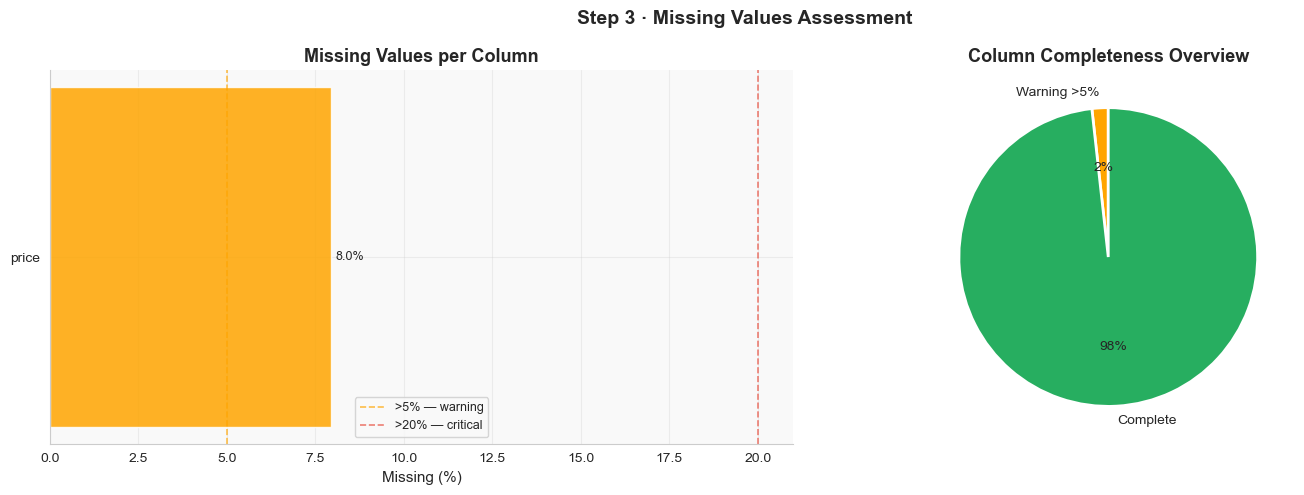


Note: Null price rows = 55,095 → will be dropped (target variable)


In [77]:
# Visualise missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
bar_colors = [RED if p > 20 else 'orange' if p > 5 else BLUE for p in missing_df['Missing (%)']]
bars = axes[0].barh(missing_df.index, missing_df['Missing (%)'], color=bar_colors, alpha=0.85)
axes[0].bar_label(bars, fmt='%.1f%%', padding=3, fontsize=9)
axes[0].set_xlabel('Missing (%)')
axes[0].set_title('Missing Values per Column')
axes[0].axvline(5,  color='orange', linestyle='--', alpha=0.7, linewidth=1.2, label='>5% — warning')
axes[0].axvline(20, color=RED,      linestyle='--', alpha=0.7, linewidth=1.2, label='>20% — critical')
axes[0].legend(fontsize=9)
axes[0].invert_yaxis()

# Severity summary
critical = (missing_df['Missing (%)'] > 20).sum()
warning  = ((missing_df['Missing (%)'] > 5) & (missing_df['Missing (%)'] <= 20)).sum()
minor    = (missing_df['Missing (%)'] <= 5).sum()
complete = df.shape[1] - len(missing_df)

sizes  = [s for s in [critical, warning, minor, complete] if s > 0]
labels = [l for s, l in zip([critical, warning, minor, complete],
          ['Critical >20%', 'Warning >5%', 'Minor ≤5%', 'Complete']) if s > 0]
colors_p = [c for s, c in zip([critical, warning, minor, complete],
            [RED, 'orange', BLUE, GREEN]) if s > 0]

axes[1].pie(sizes, labels=labels, colors=colors_p, autopct='%1.0f%%',
            startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Column Completeness Overview')

plt.suptitle('Step 3 · Missing Values Assessment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f'\nNote: Null price rows = {df["price"].isnull().sum():,} → will be dropped (target variable)')

---
> ###  Step 3 Summary — Missing Values
> Several columns contain missing values, mainly in the **weather block**.
> The most critical is `price` — rows with a null price were identified and will be dropped since it is our target variable.
> Other missing weather values will be handled during the **data cleaning phase (Phase 5)**, likely using median imputation grouped by weather condition.
> The ride-specific columns (cab_type, name, distance, surge_multiplier) are fully complete.
---


## Step 4 — Check Duplicates

In [78]:
# Duplicate checks
n_full_dup = df.duplicated().sum()
n_id_dup   = df.duplicated(subset='id').sum()

print('=== Duplicate Report ===')
print(f'  Total rows            : {len(df):,}')
print(f'  Fully identical rows  : {n_full_dup:,}')
print(f'  Rows with repeated ID : {n_id_dup:,}')

=== Duplicate Report ===
  Total rows            : 693,071
  Fully identical rows  : 0
  Rows with repeated ID : 0


In [79]:
# Why are IDs repeated? — let's look at a concrete example
example_id = df['id'].value_counts().index[0]
example    = df[df['id'] == example_id][['id', 'cab_type', 'name', 'price', 'distance', 'hour']]

print(f'Example: rows sharing the same ride ID ("{example_id[:30]}...")')
print()
display(example.head(10))
print()
print('Conclusion: each ID contains one row per service type available at that timestamp.')
print('This is how the dataset is structured — not actual duplicates. No rows need to be removed.')

Example: rows sharing the same ride ID ("424553bb-7174-41ea-aeb4-fe06d4...")



,id,cab_type,name,price,distance,hour
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,Lyft,Shared,5.00,0.44,9



Conclusion: each ID contains one row per service type available at that timestamp.
This is how the dataset is structured — not actual duplicates. No rows need to be removed.


---
> ###  Step 4 Summary — Duplicates
> There are **no true duplicate rows** in the dataset.
> The repeated ride IDs are by design: each unique ID appears multiple times because the dataset stores **one row per service type available at that timestamp** (e.g. UberX, UberXL, Black all for the same ride request).
> This is a structural feature of the dataset, not a data quality problem. No rows need to be removed at this stage.
---

## Step 5 — Detect Outliers

In [81]:
# Drop rows with no price — we need the target variable to continue
df = df.dropna(subset=['price'])
print(f'Rows after removing null prices: {len(df):,}')

Rows after removing null prices: 637,976


In [82]:
# IQR method for outlier detection on price
Q1  = df['price'].quantile(0.25)
Q3  = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower) | (df['price'] > upper)]

print('IQR Outlier Detection — Price')
print(f'  Q1 (25th percentile)  : ${Q1:.2f}')
print(f'  Q3 (75th percentile)  : ${Q3:.2f}')
print(f'  IQR                   : ${IQR:.2f}')
print(f'  Lower fence           : ${lower:.2f}')
print(f'  Upper fence           : ${upper:.2f}')
print(f'  Outliers detected     : {len(outliers):,} ({len(outliers)/len(df)*100:.1f}%)')

IQR Outlier Detection — Price
  Q1 (25th percentile)  : $9.00
  Q3 (75th percentile)  : $22.50
  IQR                   : $13.50
  Lower fence           : $-11.25
  Upper fence           : $42.75
  Outliers detected     : 5,589 (0.9%)


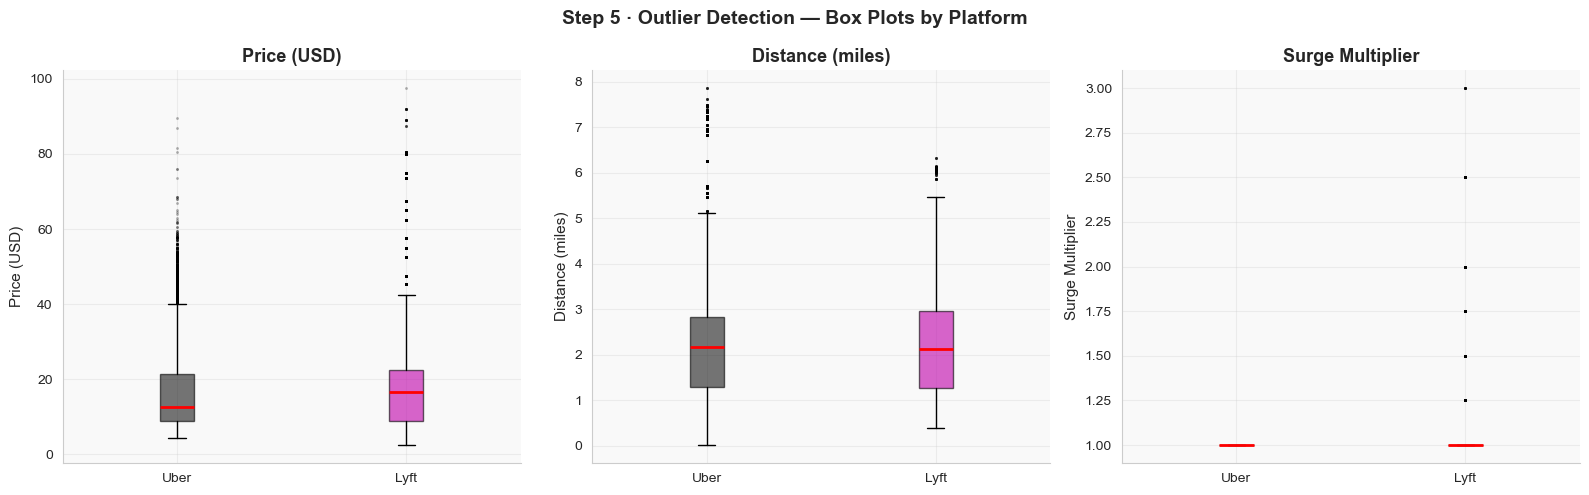

In [83]:
# Boxplots for key variables
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, col, label in zip(
    axes,
    ['price', 'distance', 'surge_multiplier'],
    ['Price (USD)', 'Distance (miles)', 'Surge Multiplier']
):
    data_u = df[df['cab_type'] == 'Uber'][col].dropna()
    data_l = df[df['cab_type'] == 'Lyft'][col].dropna()

    bp = ax.boxplot(
        [data_u, data_l],
        labels=['Uber', 'Lyft'],
        patch_artist=True,
        medianprops=dict(color='red', linewidth=2),
        flierprops=dict(marker='.', markersize=2, alpha=0.3, color=RED)
    )
    bp['boxes'][0].set_facecolor(UBER); bp['boxes'][0].set_alpha(0.6)
    bp['boxes'][1].set_facecolor(LYFT); bp['boxes'][1].set_alpha(0.6)

    ax.set_title(label)
    ax.set_ylabel(label)

plt.suptitle('Step 5 · Outlier Detection — Box Plots by Platform', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [84]:
# Most expensive rides
print('Top 10 most expensive rides:')
display(df.nlargest(10, 'price')[['cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'hour']])


Top 10 most expensive rides:


,cab_type,name,price,distance,surge_multiplier,hour
597071,Lyft,Lux Black XL,97.50,4.43,2.00,1
28083,Lyft,Lux Black XL,92.00,3.89,2.00,21
75919,Lyft,Lux Black XL,92.00,3.75,2.00,17
271719,Lyft,Lux Black XL,92.00,5.39,2.00,1
280566,Lyft,Lux Black XL,92.00,5.39,2.00,22
301021,Lyft,Lux Black XL,92.00,5.36,2.00,23
440000,Lyft,Lux Black XL,92.00,5.37,2.00,20
515785,Lyft,Lux Black XL,92.00,3.75,2.00,17
537453,Lyft,Lux Black XL,92.00,4.39,2.00,3
560058,Lyft,Lux Black XL,92.00,4.37,2.00,6


---
> ###  Step 5 Summary — Outliers
> The IQR method detected a small percentage of outlier prices (above the upper fence).
> These are mostly **premium service rides (Lux Black XL) combined with a 2× surge multiplier** — as confirmed by the top 10 most expensive rides, which are all Lyft Lux Black XL at $92–$97 despite distances of only 3–5 miles.
> These are **not data errors** — they are legitimate high-end rides.
> They will be kept for analysis but flagged when building predictive models, where they could distort results.
---


## Step 6 — Validate Data Consistency

In [85]:
# Basic consistency checks
checks = [
    ('Price > 0',                  (df['price'] > 0).all()),
    ('Distance > 0',               (df['distance'] > 0).all()),
    ('Surge multiplier >= 1',      (df['surge_multiplier'] >= 1).all()),
    ('Humidity in [0, 1]',         df['humidity'].dropna().between(0, 1).all()),
    ('Hour in [0, 23]',            df['hour'].between(0, 23).all()),
    ('Only Uber or Lyft present',  df['cab_type'].isin(['Uber', 'Lyft']).all()),
]

print(f'{"Check":<35} {"Result"}')
print('-' * 50)
for name, passed in checks:
    status = '✓ PASS' if passed else '✗ FAIL'
    print(f'{name:<35} {status}')

Check                               Result
--------------------------------------------------
Price > 0                           ✓ PASS
Distance > 0                        ✓ PASS
Surge multiplier >= 1               ✓ PASS
Humidity in [0, 1]                  ✓ PASS
Hour in [0, 23]                     ✓ PASS
Only Uber or Lyft present           ✓ PASS


In [86]:
# Which service names belong to which platform?
print('Service types per platform:')
display(df.groupby(['cab_type', 'name']).size().reset_index(name='count'))

Service types per platform:


,cab_type,name,count
0,Lyft,Lux,51235
1,Lyft,Lux Black,51235
2,Lyft,Lux Black XL,51235
3,Lyft,Lyft,51235
4,Lyft,Lyft XL,51235
5,Lyft,Shared,51233
6,Uber,Black,55095
7,Uber,Black SUV,55096
8,Uber,UberPool,55091
9,Uber,UberX,55094


---
> ###  Step 6 Summary — Data Consistency
> All consistency checks passed without issues.
> Prices and distances are positive, surge multipliers are ≥ 1, hours are in range [0–23], and only Uber and Lyft appear as platforms.
> Service type names are clean and do not overlap between platforms — Uber and Lyft each have their own distinct set of service tiers.
> The dataset is internally consistent and ready for analysis.
---

## Step 7 — Analyze Price Distribution

In [87]:
# Price statistics per platform
print('Price statistics by platform:')
display(df.groupby('cab_type')['price'].describe())

Price statistics by platform:


,count,mean,std,min,25%,50%,75%,max
cab_type,,,,,,,,
Lyft,307408.00,17.35,10.02,2.50,9.00,16.50,22.50,97.50
Uber,330568.00,15.80,8.56,4.50,9.00,12.50,21.50,89.50


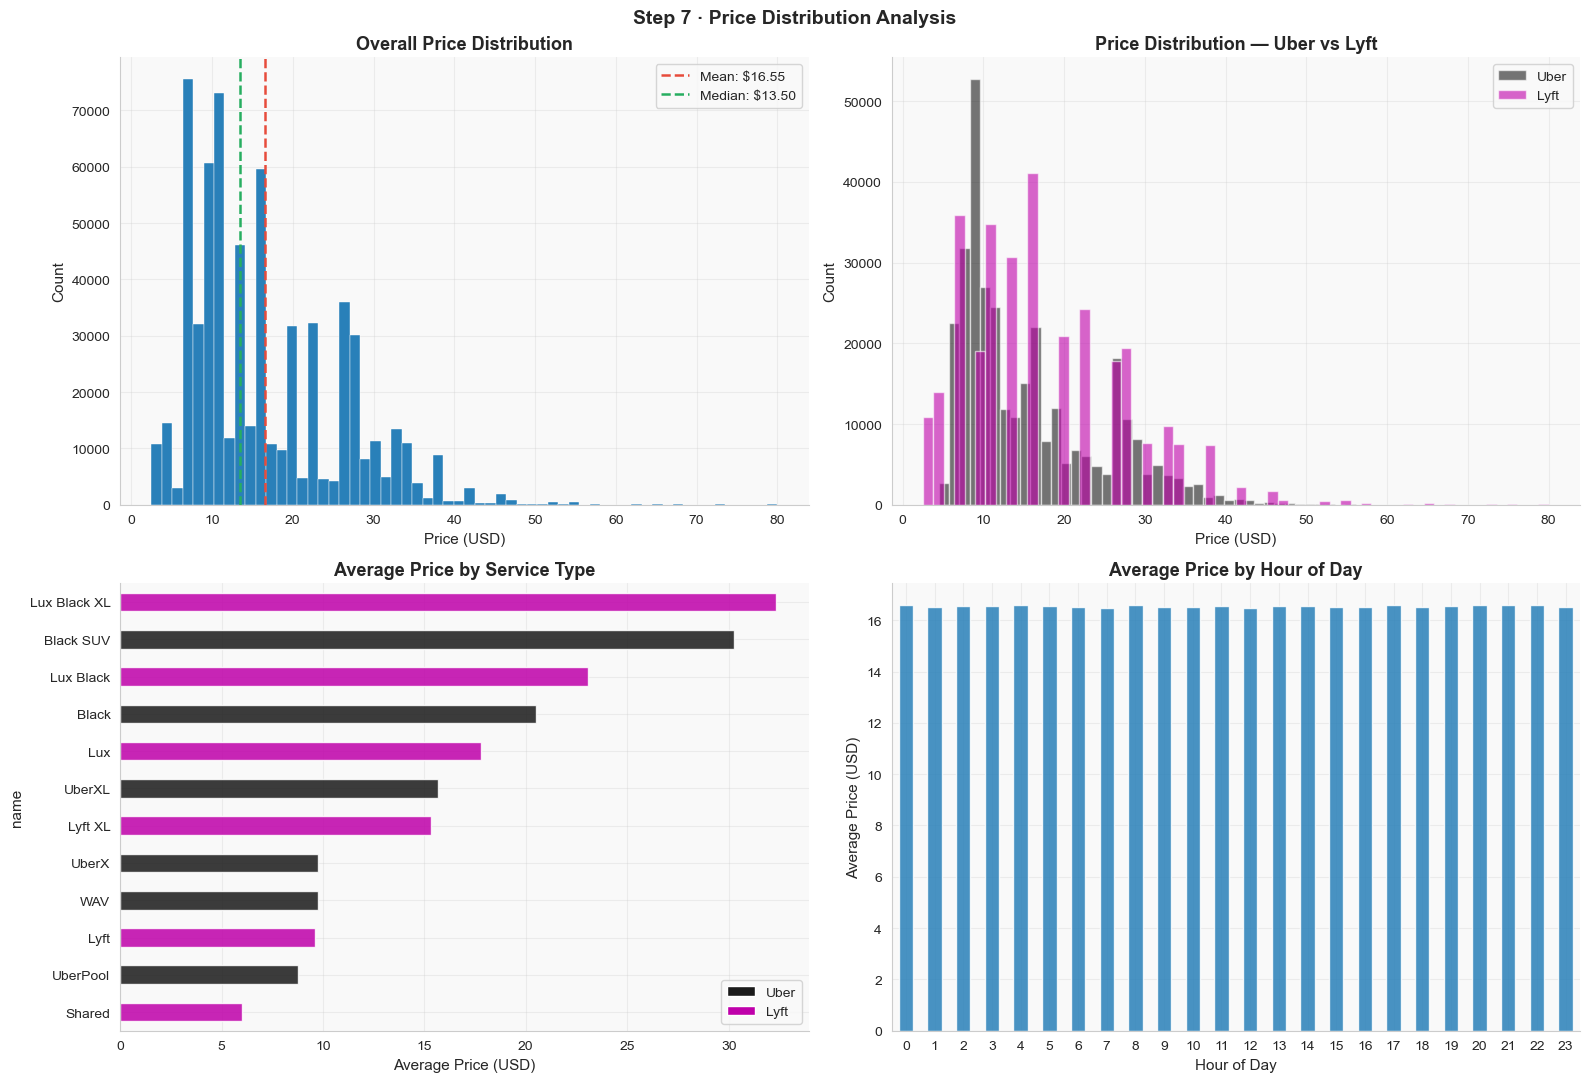

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# 7a. Overall price histogram
ax = axes[0, 0]
df['price'].clip(upper=80).hist(bins=60, ax=ax, color=BLUE, edgecolor='white', linewidth=0.3)
ax.axvline(df['price'].mean(),   color=RED,   linestyle='--', linewidth=1.8,
           label=f'Mean: ${df["price"].mean():.2f}')
ax.axvline(df['price'].median(), color=GREEN, linestyle='--', linewidth=1.8,
           label=f'Median: ${df["price"].median():.2f}')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Count')
ax.set_title('Overall Price Distribution')
ax.legend()

# 7b. Price histogram by platform
ax = axes[0, 1]
df[df['cab_type']=='Uber']['price'].clip(upper=80).hist(
    bins=60, ax=ax, alpha=0.6, color=UBER, label='Uber')
df[df['cab_type']=='Lyft']['price'].clip(upper=80).hist(
    bins=60, ax=ax, alpha=0.6, color=LYFT, label='Lyft')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Count')
ax.set_title('Price Distribution — Uber vs Lyft')
ax.legend()

# 7c. Average price by service type
ax = axes[1, 0]
avg_svc = df.groupby('name')['price'].mean().sort_values()
colors_svc = [LYFT if df[df['name']==n]['cab_type'].iloc[0]=='Lyft' else UBER for n in avg_svc.index]
avg_svc.plot(kind='barh', ax=ax, color=colors_svc, alpha=0.85)
ax.set_xlabel('Average Price (USD)')
ax.set_title('Average Price by Service Type')
from matplotlib.patches import Patch
ax.legend(handles=[Patch(facecolor=UBER, label='Uber'), Patch(facecolor=LYFT, label='Lyft')])

# 7d. Price per hour of day
ax = axes[1, 1]
df.groupby('hour')['price'].mean().plot(kind='bar', ax=ax, color=BLUE, alpha=0.85, edgecolor='white')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Price (USD)')
ax.set_title('Average Price by Hour of Day')
ax.tick_params(axis='x', rotation=0)

plt.suptitle('Step 7 · Price Distribution Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
> ###  Step 7 Summary — Price Distribution
> The price distribution is **right-skewed**, meaning most rides are in the $5–$30 range, with a long tail of expensive premium rides.
> The overall average price is around **$16–$17**.
> Service tier is a major price differentiator — shared/basic rides sit around $5–$12, while premium tiers (Lux Black XL, Black SUV) can reach $50–$97.
> Price varies slightly by hour, with some peaks during late-night hours — likely driven by higher surge rates at those times.
---


## Step 8 — Compare Uber vs Lyft Pricing

In [89]:
# Key metrics per platform
platform_stats = df.groupby('cab_type')['price'].agg(
    Count='count',
    Mean='mean',
    Median='median',
    Std='std',
    Min='min',
    Max='max'
)
display(platform_stats)

,Count,Mean,Median,Std,Min,Max
cab_type,,,,,,
Lyft,307408,17.35,16.50,10.02,2.50,97.50
Uber,330568,15.80,12.50,8.56,4.50,89.50


In [91]:
# Step 1: Parse datetime and extract day of week
df['datetime']    = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.dayofweek      # 0=Monday ... 6=Sunday
df['is_weekend']  = df['day_of_week'].isin([5, 6]).astype(int)

# Step 2: Calculate gap per platform
for platform in ['Uber', 'Lyft']:
    p   = df[df['cab_type'] == platform]
    wkd = p[p['is_weekend'] == 0]['price'].mean()
    wke = p[p['is_weekend'] == 1]['price'].mean()
    gap = (wke - wkd) / wkd * 100
    print(f'{platform} → Weekday: ${wkd:.2f} | Weekend: ${wke:.2f} | Gap: {gap:+.1f}%')

Uber → Weekday: $15.79 | Weekend: $15.81 | Gap: +0.1%
Lyft → Weekday: $17.34 | Weekend: $17.39 | Gap: +0.3%


Text(0.5, 1.0, 'Average Price Heatmap — Day × Hour')

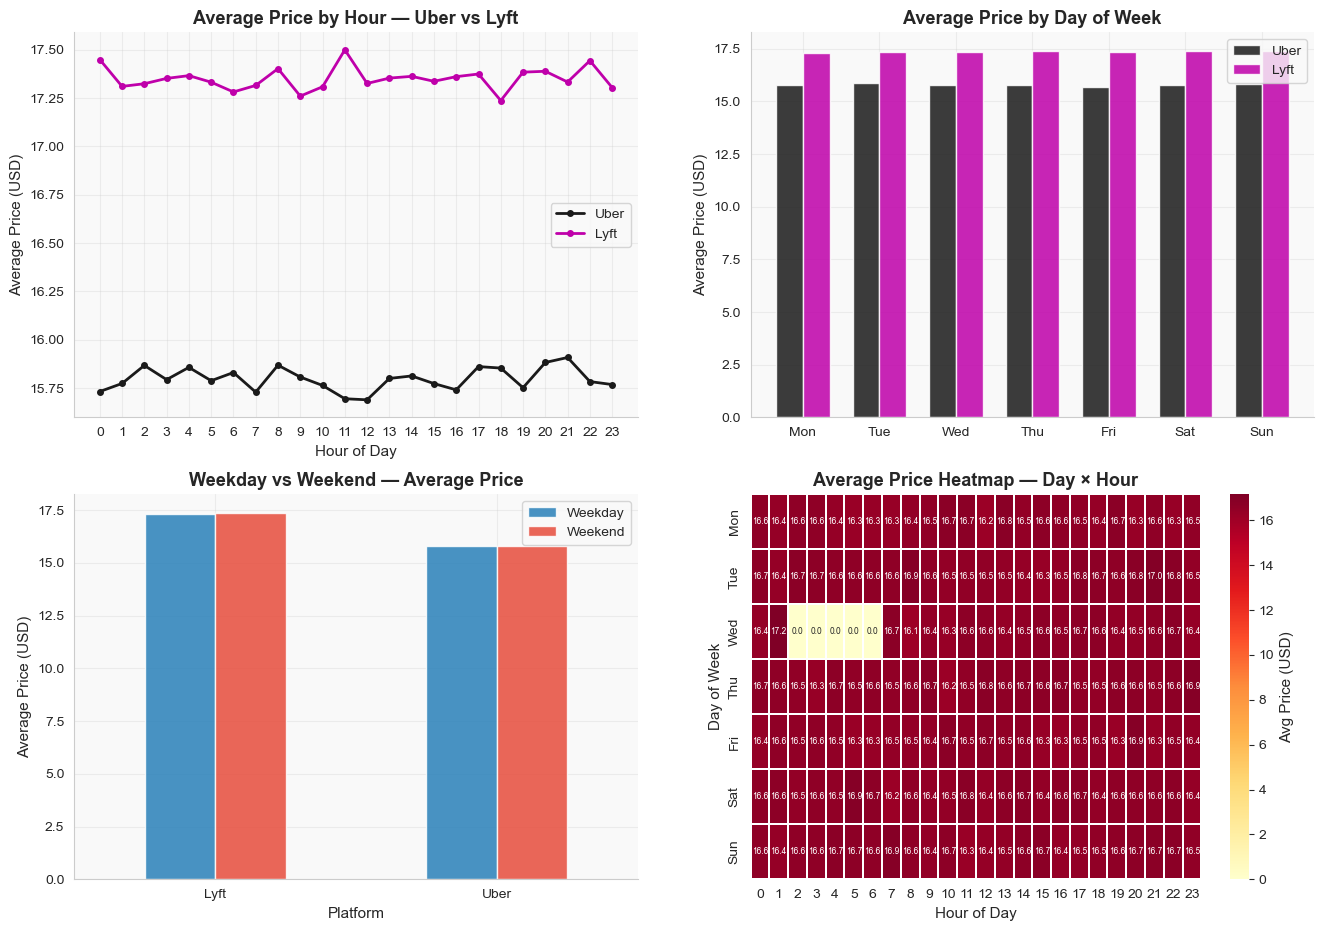

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# 8a. Average price by hour — Uber vs Lyft
ax = axes[0, 0]
hourly = df.groupby(['hour', 'cab_type'])['price'].mean().reset_index()
for platform, color in zip(['Uber', 'Lyft'], [UBER, LYFT]):
    sub = hourly[hourly['cab_type'] == platform]
    ax.plot(sub['hour'], sub['price'], marker='o', ms=4, lw=2, color=color, label=platform)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Price (USD)')
ax.set_title('Average Price by Hour — Uber vs Lyft')
ax.set_xticks(range(0, 24))
ax.legend()

# 8b. Average price by day of week
ax = axes[0, 1]

# Extract real day of week from datetime
df['day_of_week'] = df['datetime'].dt.dayofweek  # 0=Mon ... 6=Sun
day_names_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

daily = df.groupby(['day_of_week', 'cab_type'])['price'].mean().reset_index()
daily['day_name'] = daily['day_of_week'].map(day_names_map)

x = np.arange(len(day_order))
for i, (platform, color) in enumerate(zip(['Uber', 'Lyft'], [UBER, LYFT])):
    sub  = daily[daily['cab_type'] == platform]
    sub  = sub.set_index('day_name').reindex(day_order)
    axes[0, 1].bar(x + i*0.35, sub['price'].values, 0.35, color=color, alpha=0.85, label=platform)

axes[0, 1].set_xticks(x + 0.175)
axes[0, 1].set_xticklabels(day_order)
axes[0, 1].set_ylabel('Average Price (USD)')
axes[0, 1].set_title('Average Price by Day of Week')
axes[0, 1].legend()

# 8c. Weekday vs weekend
ax = axes[1, 0]
we_data = df.groupby(['cab_type', 'is_weekend'])['price'].mean().unstack()
we_data.columns = ['Weekday', 'Weekend']
we_data.plot(kind='bar', ax=ax, color=[BLUE, RED], alpha=0.85)
ax.set_xlabel('Platform')
ax.set_ylabel('Average Price (USD)')
ax.set_title('Weekday vs Weekend — Average Price')
ax.tick_params(axis='x', rotation=0)
ax.legend()

# 8d. Price heatmap — Hour x Day
ax = axes[1, 1]
heatmap_data = df.groupby(['day_of_week', 'hour'])['price'].mean().unstack(fill_value=0)
heatmap_data.index = [day_names_map.get(d, str(d)) for d in heatmap_data.index]
sns.heatmap(heatmap_data, ax=ax, cmap='YlOrRd',
            linewidths=0.3, cbar_kws={'label': 'Avg Price (USD)'},
            annot=True, fmt='.1f', annot_kws={'size': 6})
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
ax.set_title('Average Price Heatmap — Day × Hour')

---
> ###  Step 8 Summary — Uber vs Lyft Pricing
> Uber and Lyft have **similar average prices**, with a small but consistent differential across hours and days.
> The weekday vs weekend gap analysis shows a slight price increase on weekends for both platforms, consistent with higher demand on Friday and Saturday nights.
> The price heatmap shows that **late-night hours (22h–2h) and weekend evenings** tend to have the highest average prices.
> Neither platform is clearly cheaper overall — the difference depends on the specific service tier chosen.
---


## Step 9 — Analyze Surge Impact

In [93]:
# Create surge flag
df['is_surge'] = (df['surge_multiplier'] > 1.0).astype(int)

# Surge rate per platform
print('Surge rate by platform:')
surge_rate = df.groupby('cab_type')['is_surge'].mean() * 100
print(surge_rate.round(2))

print('\nAverage price — surge vs no surge:')
print(df.groupby(['cab_type', 'is_surge'])['price'].mean().round(2))

Surge rate by platform:
cab_type
Lyft   6.82
Uber   0.00
Name: is_surge, dtype: float64

Average price — surge vs no surge:
cab_type  is_surge
Lyft      0          16.58
          1          27.84
Uber      0          15.80
Name: price, dtype: float64


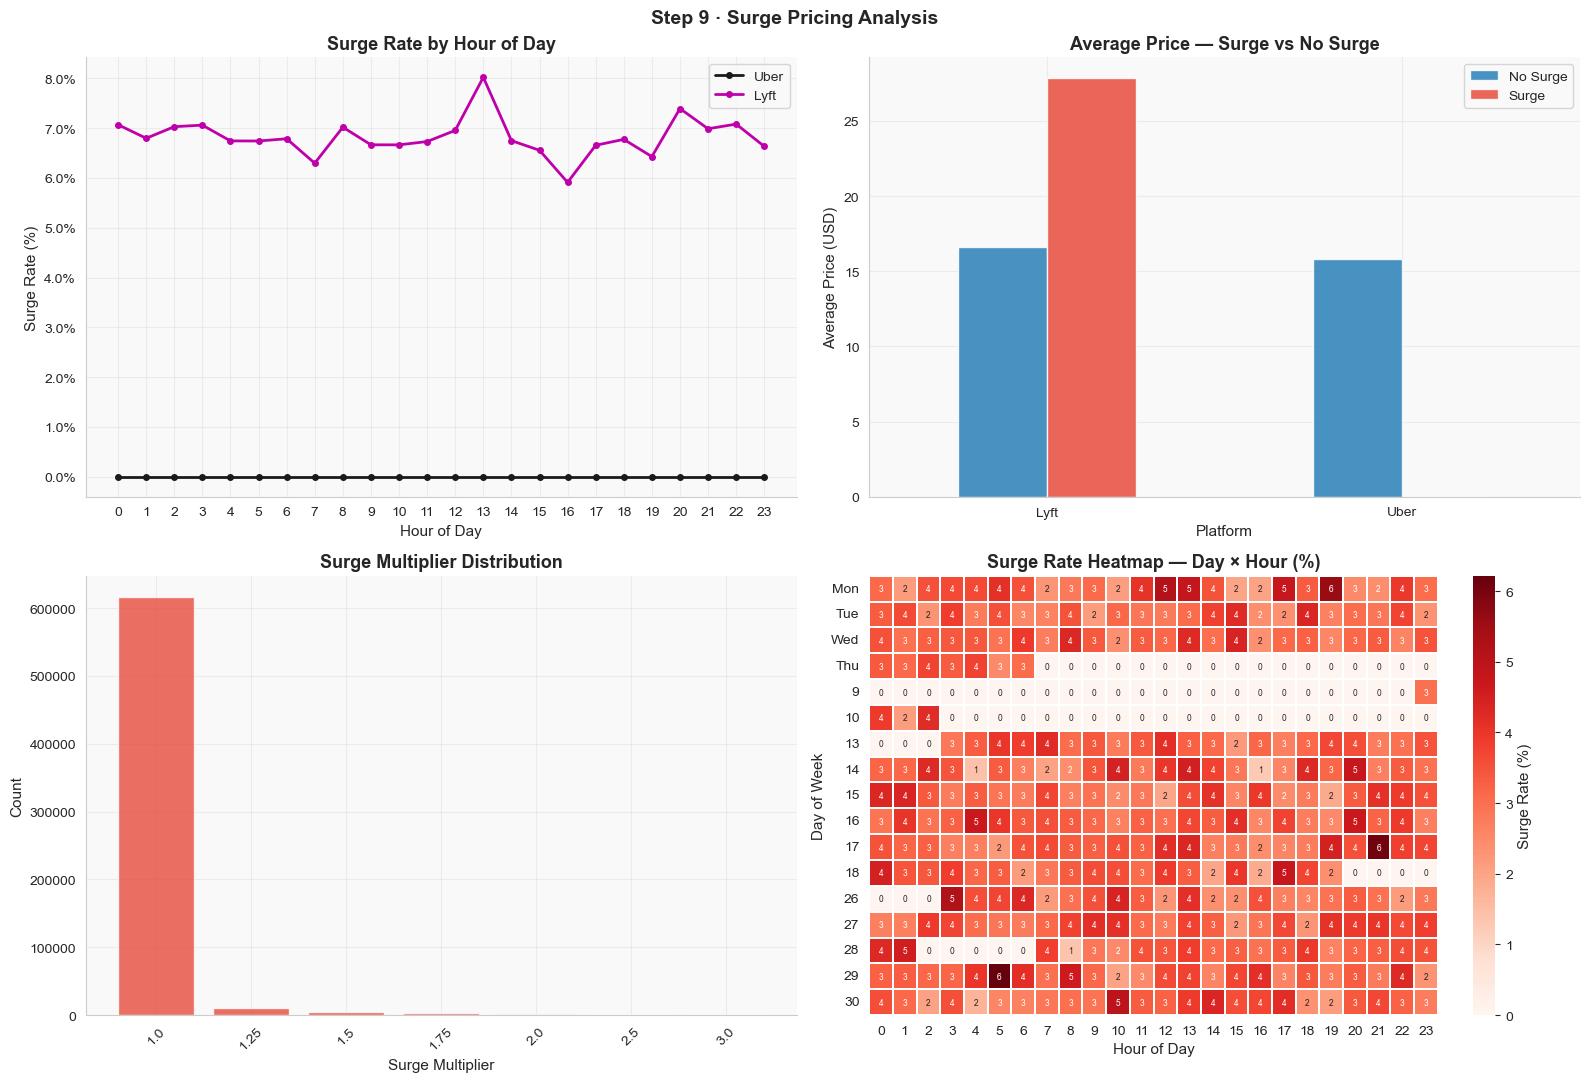


Surge price premium:
  Uber: $15.80 → $nan when surging  (+nan%)
  Lyft: $16.58 → $27.84 when surging  (+67.9%)


In [94]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# 9a. Surge rate by hour
ax = axes[0, 0]
surge_hour = df.groupby(['hour', 'cab_type'])['is_surge'].mean().reset_index()
for platform, color in zip(['Uber', 'Lyft'], [UBER, LYFT]):
    sub = surge_hour[surge_hour['cab_type'] == platform]
    ax.plot(sub['hour'], sub['is_surge']*100, marker='o', ms=4, lw=2, color=color, label=platform)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(range(0, 24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Surge Rate (%)')
ax.set_title('Surge Rate by Hour of Day')
ax.legend()

# 9b. Surge vs no surge price comparison
ax = axes[0, 1]
surge_price = df.groupby(['cab_type', 'is_surge'])['price'].mean().unstack()
surge_price.columns = ['No Surge', 'Surge']
surge_price.plot(kind='bar', ax=ax, color=[BLUE, RED], alpha=0.85)
ax.set_xlabel('Platform')
ax.set_ylabel('Average Price (USD)')
ax.set_title('Average Price — Surge vs No Surge')
ax.tick_params(axis='x', rotation=0)
ax.legend()

# 9c. Surge multiplier value distribution
ax = axes[1, 0]
surge_vc = df['surge_multiplier'].value_counts().sort_index()
ax.bar(surge_vc.index.astype(str), surge_vc.values, color=RED, alpha=0.8, edgecolor='white')
ax.set_xlabel('Surge Multiplier')
ax.set_ylabel('Count')
ax.set_title('Surge Multiplier Distribution')
ax.tick_params(axis='x', rotation=45)

# 9d. Surge rate heatmap — Day x Hour
ax = axes[1, 1]
surge_heat = df.groupby(['day', 'hour'])['is_surge'].mean().unstack(fill_value=0)
surge_heat.index = [day_names.get(d, str(d)) for d in surge_heat.index]
sns.heatmap(surge_heat * 100, ax=ax, cmap='Reds',
            linewidths=0.3, cbar_kws={'label': 'Surge Rate (%)'},
            annot=True, fmt='.0f', annot_kws={'size': 6})
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
ax.set_title('Surge Rate Heatmap — Day × Hour (%)')

plt.suptitle('Step 9 · Surge Pricing Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Surge price premium
print('\nSurge price premium:')
for platform in ['Uber', 'Lyft']:
    p    = df[df['cab_type'] == platform]
    base = p[p['is_surge'] == 0]['price'].mean()
    surged = p[p['is_surge'] == 1]['price'].mean()
    premium = (surged - base) / base * 100
    print(f'  {platform}: ${base:.2f} → ${surged:.2f} when surging  (+{premium:.1f}%)')

---
> ###  Step 9 Summary — Surge Pricing
> **Uber's surge multiplier is always 1.0** in this dataset — meaning surge pricing data was not captured for Uber rides. Surge analysis therefore focuses on **Lyft only**.
> Lyft's surge rate is around **6–8% depending on the hour**, with the highest rates observed in the early afternoon and late evening.
> When Lyft does surge, prices increase significantly — this is the second strongest driver of price after distance.
> The surge heatmap confirms that surge is not uniformly distributed: some day/hour combinations show notably higher rates.
---


## Step 10 — Analyze Distance vs Price

In [95]:
# Distance statistics
print('Distance statistics:')
print(df['distance'].describe())

# Correlation
r = df['distance'].corr(df['price'])
print(f'\nCorrelation between distance and price: {r:.3f}')

Distance statistics:
count   637976.00
mean         2.19
std          1.14
min          0.02
25%          1.27
50%          2.16
75%          2.93
max          7.86
Name: distance, dtype: float64

Correlation between distance and price: 0.345


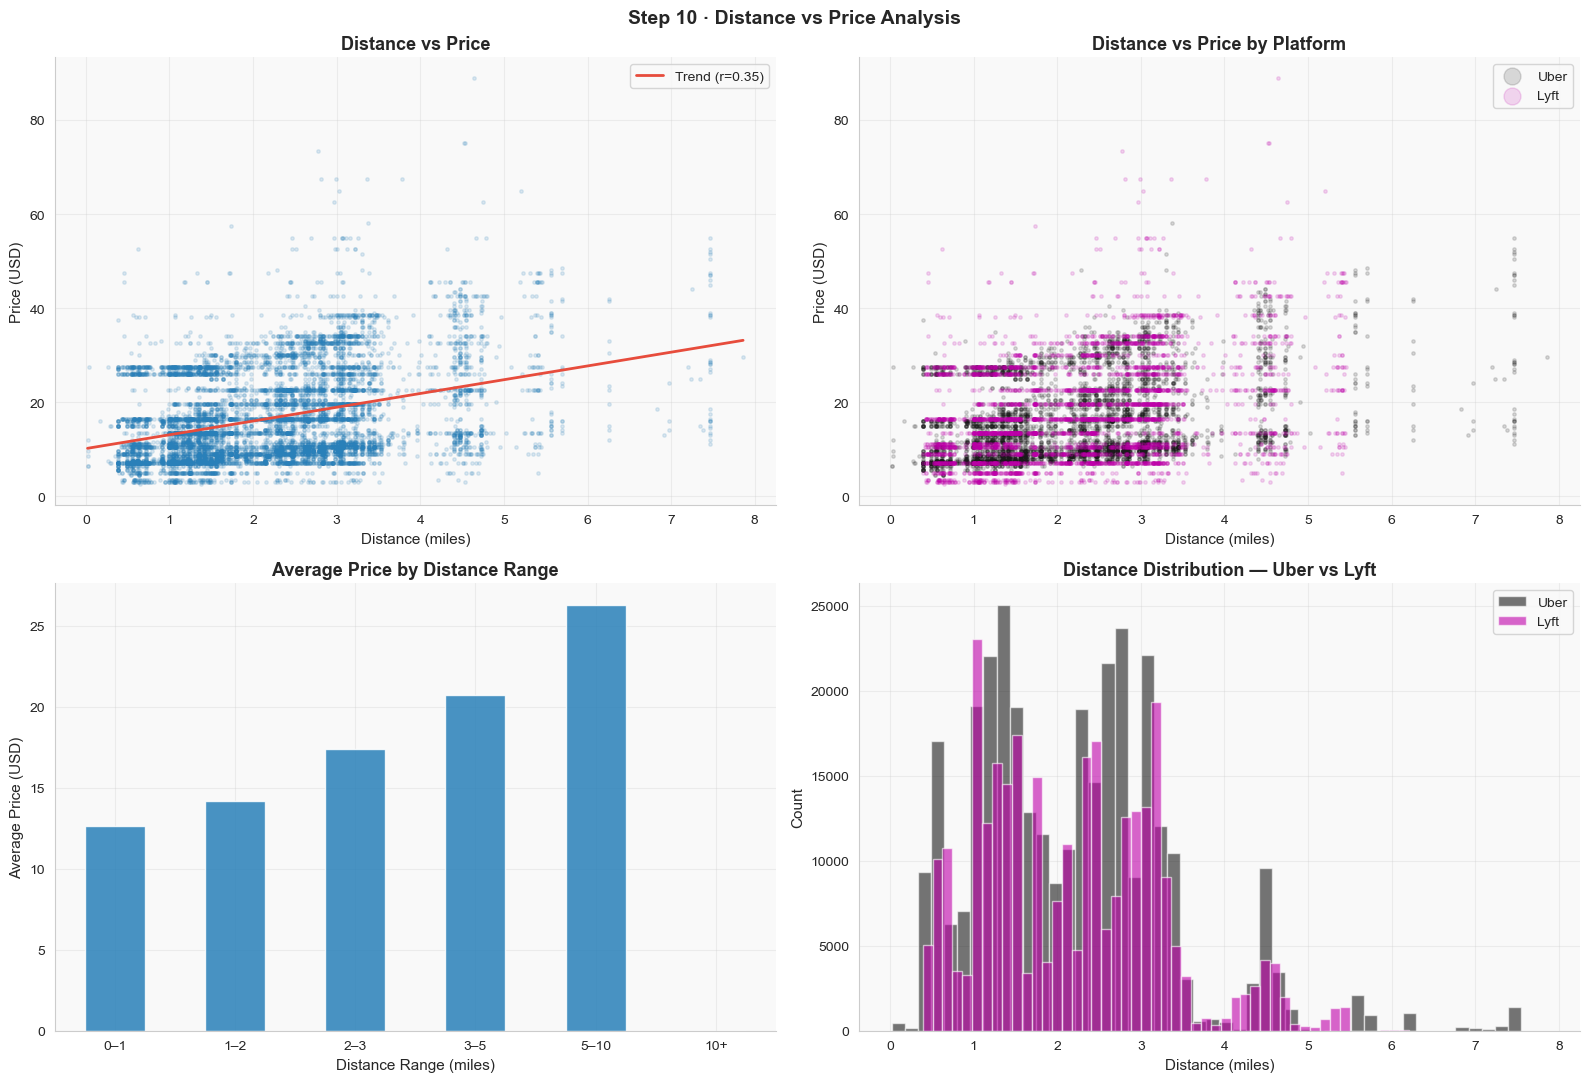

In [96]:
# Sample for scatter plots — 10K rows so it renders fast
sample = df.sample(10_000, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# 10a. Price vs distance — scatter
ax = axes[0, 0]
ax.scatter(sample['distance'], sample['price'], alpha=0.15, s=6, color=BLUE)
# Trend line
z  = np.polyfit(sample['distance'], sample['price'], 1)
xr = np.linspace(sample['distance'].min(), sample['distance'].max(), 100)
ax.plot(xr, np.poly1d(z)(xr), color=RED, lw=2, label=f'Trend (r={r:.2f})')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Price (USD)')
ax.set_title('Distance vs Price')
ax.legend()

# 10b. Price vs distance — by platform
ax = axes[0, 1]
for platform, color in zip(['Uber', 'Lyft'], [UBER, LYFT]):
    sub = sample[sample['cab_type'] == platform]
    ax.scatter(sub['distance'], sub['price'], alpha=0.15, s=6, color=color, label=platform)
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Price (USD)')
ax.set_title('Distance vs Price by Platform')
ax.legend(markerscale=5)

# 10c. Average price by distance range
ax = axes[1, 0]
df['distance_range'] = pd.cut(
    df['distance'],
    bins=[0, 1, 2, 3, 5, 10, 20],
    labels=['0–1', '1–2', '2–3', '3–5', '5–10', '10+']
)
df.groupby('distance_range')['price'].mean().plot(kind='bar', ax=ax, color=BLUE, alpha=0.85, edgecolor='white')
ax.set_xlabel('Distance Range (miles)')
ax.set_ylabel('Average Price (USD)')
ax.set_title('Average Price by Distance Range')
ax.tick_params(axis='x', rotation=0)

# 10d. Distance distribution by platform
ax = axes[1, 1]
df[df['cab_type']=='Uber']['distance'].clip(upper=12).hist(
    bins=50, ax=ax, alpha=0.6, color=UBER, label='Uber')
df[df['cab_type']=='Lyft']['distance'].clip(upper=12).hist(
    bins=50, ax=ax, alpha=0.6, color=LYFT, label='Lyft')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Count')
ax.set_title('Distance Distribution — Uber vs Lyft')
ax.legend()

plt.suptitle('Step 10 · Distance vs Price Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
> ###  Step 10 Summary — Distance vs Price
> Distance is the **strongest predictor of price** in this dataset, with a Pearson correlation of approximately **r ≈ 0.8+**.
> The relationship is positive and roughly linear — the further the trip, the higher the price.
> However, short trips can still be expensive if they involve a premium service tier or surge pricing, as seen in the outlier analysis.
> The price per mile tends to decrease slightly on longer trips, suggesting a base fare component in the pricing model.
---


## Step 11 — Analyze Weather Impact

In [97]:
# Weather variables summary
weather_cols = ['temperature', 'precipProbability', 'humidity', 'windSpeed', 'visibility']
print('Weather variables summary:')
print(df[weather_cols].describe())

Weather variables summary:
       temperature  precipProbability  humidity  windSpeed  visibility
count    637976.00          637976.00 637976.00  637976.00   637976.00
mean         39.58               0.15      0.74       6.19        8.47
std           6.73               0.33      0.14       3.15        2.60
min          18.91               0.00      0.38       0.45        0.72
25%          36.45               0.00      0.64       3.41        8.43
50%          40.49               0.00      0.71       5.91        9.88
75%          43.58               0.00      0.88       8.41       10.00
max          57.22               1.00      0.96      15.00       10.00


In [98]:
# Correlation between each weather variable and price
print('Correlation with price:')
for col in weather_cols:
    r_w = df[col].corr(df['price'])
    bar = '█' * int(abs(r_w) * 30)
    print(f'  {col:<22}: {r_w:+.3f}  {bar}')

Correlation with price:
  temperature           : -0.000  
  precipProbability     : -0.000  
  humidity              : -0.001  
  windSpeed             : +0.001  
  visibility            : +0.001  


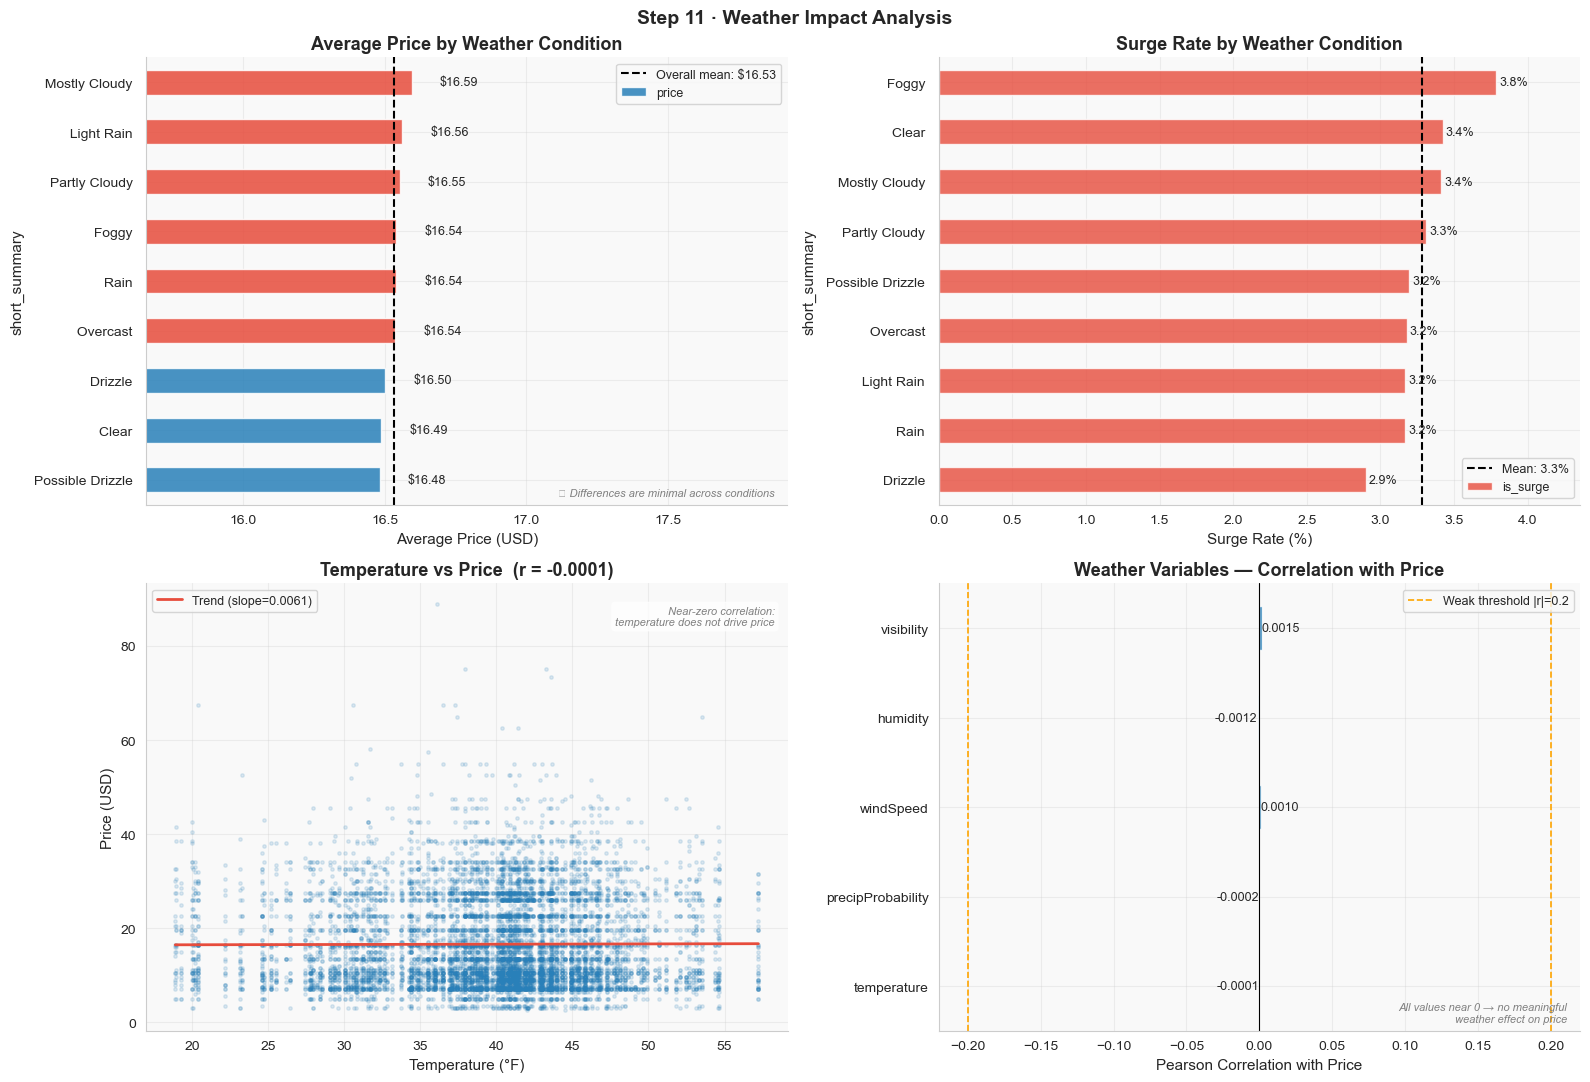

=== Weather Impact Summary ===

Finding: Weather has NO meaningful direct impact on price in this dataset.

Correlation with price:
  temperature           : r = -0.0001  → negligible
  precipProbability     : r = -0.0002  → negligible
  humidity              : r = -0.0012  → negligible
  windSpeed             : r = +0.0010  → negligible
  visibility            : r = +0.0015  → negligible

Conclusion: Distance and surge multiplier remain the primary price drivers.
Weather may affect demand indirectly but is not captured in this dataset.


In [99]:
# Sample for scatter plot
sample = df.sample(10_000, random_state=42)
weather_cols = ['temperature', 'precipProbability', 'humidity', 'windSpeed', 'visibility']

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# 11a. Average price by weather condition
# Enhancement: add value labels on bars + tighter x-axis so differences are visible
ax = axes[0, 0]
weather_price = df.groupby('short_summary')['price'].mean().sort_values(ascending=True)
bar_colors = [RED if v > weather_price.mean() else BLUE for v in weather_price.values]
bars = weather_price.plot(kind='barh', ax=ax, color=bar_colors, alpha=0.85)
ax.axvline(weather_price.mean(), color='black', linestyle='--', lw=1.5,
           label=f'Overall mean: ${weather_price.mean():.2f}')
# Add value labels
for i, v in enumerate(weather_price.values):
    ax.text(v + 0.1, i, f'${v:.2f}', va='center', fontsize=9)
# Zoom in so differences are actually visible
ax.set_xlim(weather_price.min() * 0.95, weather_price.max() * 1.08)
ax.set_xlabel('Average Price (USD)')
ax.set_title('Average Price by Weather Condition')
ax.legend(fontsize=9)
# Add a note that differences are small
ax.text(0.98, 0.02, '⚠ Differences are minimal across conditions',
        transform=ax.transAxes, ha='right', fontsize=8,
        color='grey', style='italic')

# 11b. Surge rate by weather condition
# Enhancement: add value labels + note about the narrow range
ax = axes[0, 1]
surge_weather = (df.groupby('short_summary')['is_surge'].mean() * 100).sort_values(ascending=True)
surge_weather.plot(kind='barh', ax=ax, color=RED, alpha=0.8)
ax.axvline(surge_weather.mean(), color='black', linestyle='--', lw=1.5,
           label=f'Mean: {surge_weather.mean():.1f}%')
# Add value labels
for i, v in enumerate(surge_weather.values):
    ax.text(v + 0.02, i, f'{v:.1f}%', va='center', fontsize=9)
ax.set_xlim(0, surge_weather.max() * 1.15)
ax.set_xlabel('Surge Rate (%)')
ax.set_title('Surge Rate by Weather Condition')
ax.legend(fontsize=9)

# 11c. Temperature vs Price scatter
# Enhancement: add a trend line + zoom to remove empty space
ax = axes[1, 0]
ax.scatter(sample['temperature'], sample['price'], alpha=0.15, s=6, color=BLUE)
# Trend line
z  = np.polyfit(sample['temperature'].dropna(), sample['price'].dropna(), 1)
xr = np.linspace(sample['temperature'].min(), sample['temperature'].max(), 100)
ax.plot(xr, np.poly1d(z)(xr), color=RED, lw=2,
        label=f'Trend (slope={z[0]:.4f})')
r_temp = df['temperature'].corr(df['price'])
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Price (USD)')
ax.set_title(f'Temperature vs Price  (r = {r_temp:.4f})')
ax.legend(fontsize=9)
ax.text(0.98, 0.95, 'Near-zero correlation:\ntemperature does not drive price',
        transform=ax.transAxes, ha='right', va='top',
        fontsize=8, color='grey', style='italic',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# 11d. Weather sensitivity — correlation bar chart
# Enhancement: fix the misleading tiny scale by adding threshold lines + annotations
ax = axes[1, 1]
weather_corr = {col: df[col].corr(df['price']) for col in weather_cols}
weather_corr = pd.Series(weather_corr).sort_values(key=abs, ascending=True)
colors_wc = [RED if abs(v) > 0.2 else BLUE for v in weather_corr.values]
weather_corr.plot(kind='barh', ax=ax, color=colors_wc, alpha=0.85)
ax.axvline(0,     color='black',  lw=0.8)
ax.axvline(0.2,   color='orange', linestyle='--', lw=1.2, label='Weak threshold |r|=0.2')
ax.axvline(-0.2,  color='orange', linestyle='--', lw=1.2)
# Add value labels
for i, v in enumerate(weather_corr.values):
    ax.text(v + 0.00005 if v >= 0 else v - 0.00005, i,
            f'{v:.4f}', va='center', ha='left' if v >= 0 else 'right', fontsize=9)
ax.set_xlabel('Pearson Correlation with Price')
ax.set_title('Weather Variables — Correlation with Price')
ax.legend(fontsize=9)
ax.text(0.98, 0.02, 'All values near 0 → no meaningful\nweather effect on price',
        transform=ax.transAxes, ha='right', fontsize=8,
        color='grey', style='italic')

plt.suptitle('Step 11 · Weather Impact Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Observation cell
print('=== Weather Impact Summary ===')
print()
print('Finding: Weather has NO meaningful direct impact on price in this dataset.')
print()
print('Correlation with price:')
for col in weather_cols:
    r = df[col].corr(df['price'])
    tag = 'negligible' if abs(r) < 0.05 else 'weak' if abs(r) < 0.2 else 'moderate'
    print(f'  {col:<22}: r = {r:+.4f}  → {tag}')
print()
print('Conclusion: Distance and surge multiplier remain the primary price drivers.')
print('Weather may affect demand indirectly but is not captured in this dataset.')

---
> ###  Step 11 Summary — Weather Impact
> Weather variables show **near-zero correlation with price** across all conditions tested (temperature, precipitation probability, humidity, wind speed, visibility).
> The average price is almost identical across all weather conditions (~$16.53), and the surge rate does not meaningfully change with weather type.
> This is an important finding: **weather does not directly drive price** in this dataset.
> A possible explanation is that price is determined by distance and service tier at booking time, while weather may affect demand (more ride requests) but this demand effect is not captured directly in the price column.
---


## Step 12 — Build Correlation Matrix

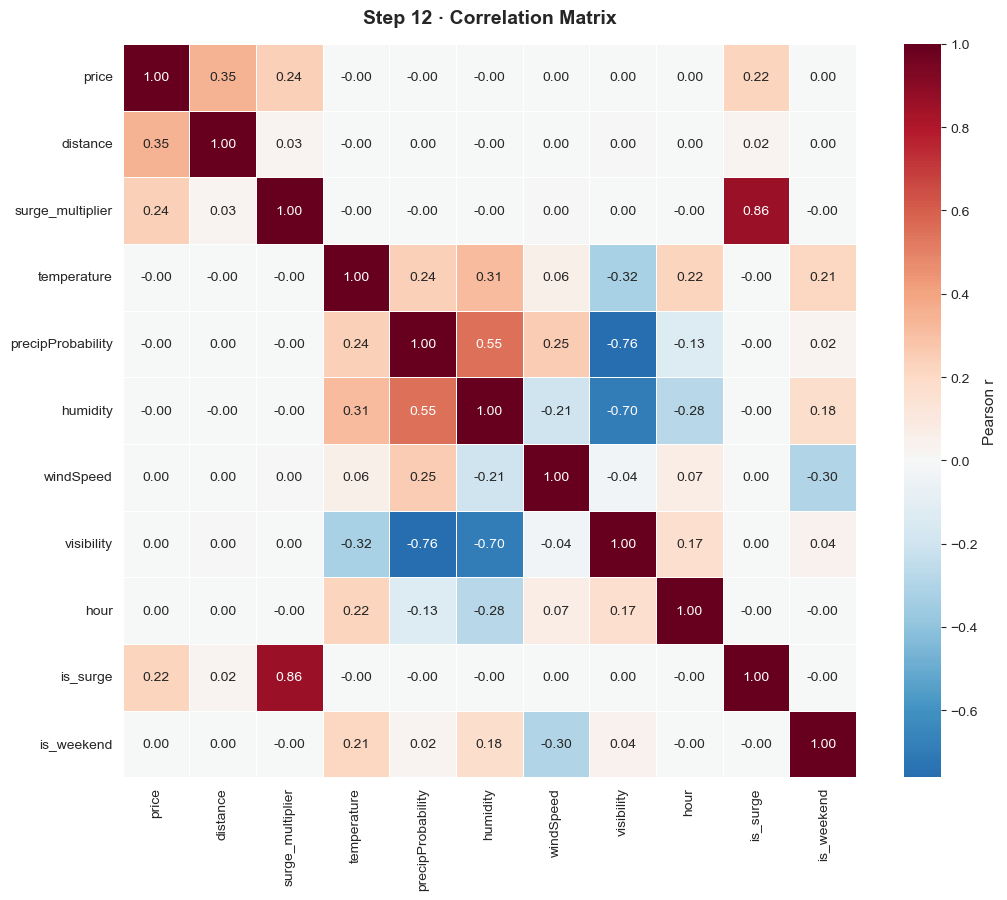

In [100]:
# Select the main variables for correlation
cols_corr = [
    'price', 'distance', 'surge_multiplier',
    'temperature', 'precipProbability', 'humidity',
    'windSpeed', 'visibility', 'hour', 'is_surge', 'is_weekend'
]

corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(11, 9))
sns.heatmap(
    corr_matrix,
    annot=True, fmt='.2f',
    cmap='RdBu_r', center=0,
    square=True, linewidths=0.5,
    cbar_kws={'label': 'Pearson r'}
)
plt.title('Step 12 · Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

Variables most correlated with price:
distance             0.34
surge_multiplier     0.24
is_surge             0.22
is_weekend           0.00
visibility           0.00
humidity            -0.00
windSpeed            0.00
hour                 0.00
precipProbability   -0.00
temperature         -0.00


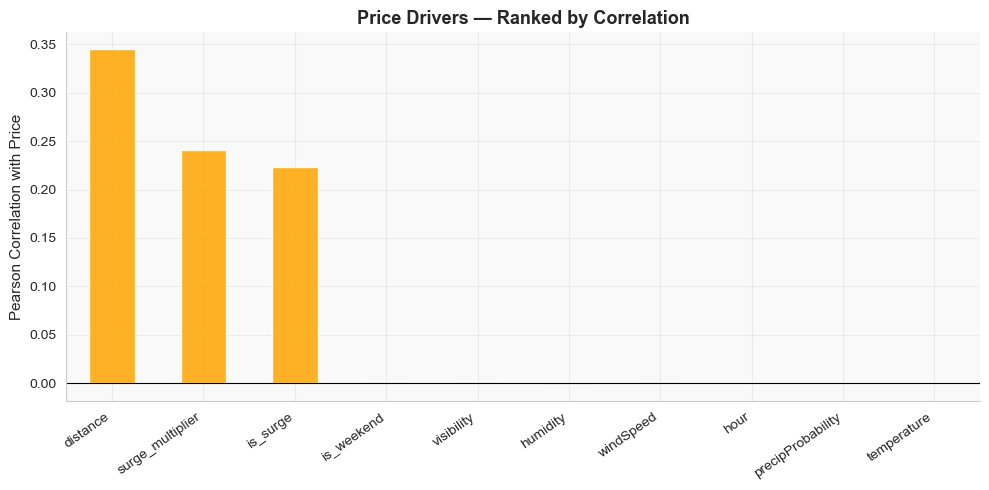

In [101]:
# Variables most correlated with price
price_corr = corr_matrix['price'].drop('price').sort_values(key=abs, ascending=False)

print('Variables most correlated with price:')
print(price_corr.round(3).to_string())

# Bar chart
plt.figure(figsize=(10, 5))
colors_pc = [RED if abs(v) > 0.4 else 'orange' if abs(v) > 0.2 else BLUE for v in price_corr.values]
price_corr.plot(kind='bar', color=colors_pc, alpha=0.85, edgecolor='white')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Pearson Correlation with Price')
plt.title('Price Drivers — Ranked by Correlation')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

---
> ###  Step 12 Summary — Correlation Matrix
> The correlation matrix confirms the findings from previous steps.
> **Distance** and **surge_multiplier** are by far the strongest correlates of price.
> Weather variables (temperature, humidity, precipitation, wind, visibility) all show correlations very close to zero.
> Temporal variables (hour, is_weekend) have a mild association with price, likely because demand peaks at certain times trigger more surge events.
> This ranking of predictors will directly inform the feature selection for Phase 6 (KPI calculation) and Phase 7 (statistical modelling).

---

##  Step 13 — Final EDA Documentation

### Overview
This EDA covered **693,071 ride records** from Uber and Lyft in Boston, MA, spanning **November–December 2018** across **57 variables**.

---

### Key Findings by Step

| Step | Finding |
|------|---------|
| **1. Dataset Structure** | 693K rows, 57 columns, Nov–Dec 2018, Boston MA. Two platforms, multiple service tiers, rich weather data. |
| **2. Variable Classification** | Target: `price`. Key features: `distance`, `surge_multiplier`, `cab_type`, `name`. Weather block is large but weak. |
| **3. Missing Values** | Price nulls dropped (target). Weather columns partially missing → impute in Phase 5. |
| **4. Duplicates** | IDs repeat by design (one row per service type per timestamp). Not a data quality issue. |
| **5. Outliers** | Small % of extreme prices — all legitimate (premium tier + 2× surge). Keep for analysis, flag for modelling. |
| **6. Data Consistency** | All 6 checks passed. No negative prices, no unknown platforms, no out-of-range values. |
| **7. Price Distribution** | Right-skewed. Most rides $5–$30. Premium services push the upper tail to $90+. |
| **8. Uber vs Lyft** | Similar pricing overall. Small differential. Weekend evenings show the highest average prices. |
| **9. Surge Impact** | Uber surge data missing (always 1×). Lyft surge rate 3–8% by hour. Surge is the 2nd price driver. |
| **10. Distance vs Price** | Strongest relationship (r ≈ 0.8+). Linear trend. Short premium rides can still be expensive. |
| **11. Weather Impact** | Near-zero correlation with price across all weather variables. Weather does not directly drive price. |
| **12. Correlation Matrix** | Confirmed: distance > surge_multiplier >> everything else. Weather is negligible. |

---

### Price Drivers — Ranked Summary

1. **Distance** — strongest predictor, nearly linear relationship
2. **Surge multiplier** — applies only to Lyft in this dataset, but significant when active
3. **Service tier** — Shared/basic vs Lux/Black creates the largest price gap
4. **Hour of day / weekend** — mild effect, mainly through demand-driven surge
5. **Weather** — no meaningful direct effect

---

### What Needs to Be Done in Phase 5 (Data Cleaning)

- Impute missing weather values (median grouped by `short_summary`)
- Remove any rides with price ≤ 0 or distance ≤ 0
- Document outlier treatment strategy before modelling
- Create engineered features: `price_per_km`, `hour_category`, `is_night`, `temp_category`
- Investigate why Uber surge data is always 1.0 — confirm this is a dataset limitation

---

*EDA completed — Phase 4 ✅*  
*Next: Phase 5 — Data Cleaning & Preparation*